## Z Score


Empatica Model (NB) Accuracy: 0.49074074074074076
Samsung Model (NB) Accuracy: 0.0874485596707819

Classification Report (Empatica Model NB):
               precision    recall  f1-score   support

           0       0.00      0.00      1.00       486
           1       0.50      0.98      0.66       486

    accuracy                           0.49       972
   macro avg       0.25      0.49      0.83       972
weighted avg       0.25      0.49      0.83       972


Classification Report (Samsung Model NB):
               precision    recall  f1-score   support

           0       0.15      0.17      0.16       486
           1       0.00      0.00      0.00       486

    accuracy                           0.09       972
   macro avg       0.08      0.09      0.08       972
weighted avg       0.08      0.09      0.08       972


Confusion Matrix (Empatica Model NB):
 [[  0 486]
 [  9 477]]

Confusion Matrix (Samsung Model NB):
 [[ 84 402]
 [485   1]]


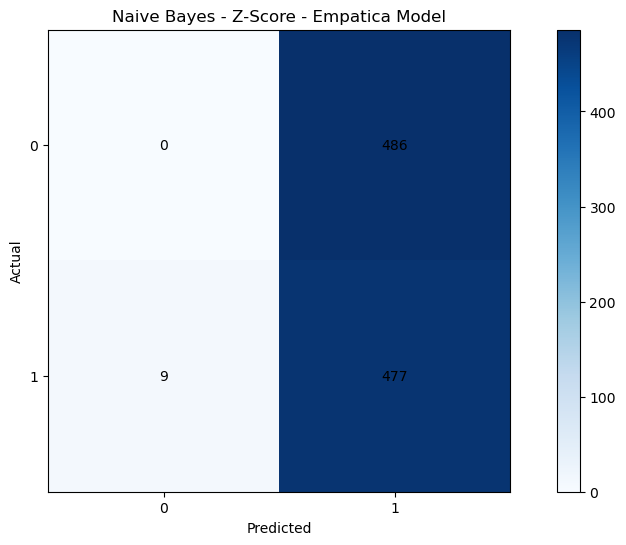

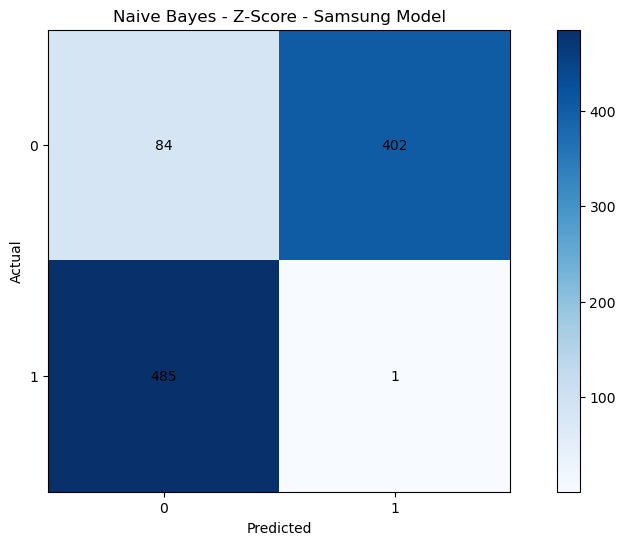

In [1]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define Naive Bayes models
model_empatica_nb = GaussianNB()
model_samsung_nb = GaussianNB()

# Train the models
model_empatica_nb.fit(X_train_empatica, y_train_empatica)
model_samsung_nb.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica_nb = model_empatica_nb.predict(X_test_empatica)
y_pred_samsung_nb = model_samsung_nb.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_nb = accuracy_score(y_test_empatica, y_pred_empatica_nb)
accuracy_samsung_nb = accuracy_score(y_test_samsung, y_pred_samsung_nb)

print("Empatica Model (NB) Accuracy:", accuracy_empatica_nb)
print("Samsung Model (NB) Accuracy:", accuracy_samsung_nb)

# Classification report
print(
    "\nClassification Report (Empatica Model NB):\n",
    classification_report(y_test_empatica, y_pred_empatica_nb, zero_division=1),
)
print(
    "\nClassification Report (Samsung Model NB):\n",
    classification_report(y_test_samsung, y_pred_samsung_nb, zero_division=1),
)

# Confusion matrix
conf_mat_empatica_nb = confusion_matrix(y_test_empatica, y_pred_empatica_nb)
conf_mat_samsung_nb = confusion_matrix(y_test_samsung, y_pred_samsung_nb)

print("\nConfusion Matrix (Empatica Model NB):\n", conf_mat_empatica_nb)
print("\nConfusion Matrix (Samsung Model NB):\n", conf_mat_samsung_nb)

# Visualize the cm for Empatica model
plt.figure(figsize=(12, 6))
plt.imshow(conf_mat_empatica_nb, cmap="Blues")
plt.title("Naive Bayes - Z-Score - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_nb.shape[0]):
    for j in range(conf_mat_empatica_nb.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_nb[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the cm for Samsung model
plt.figure(figsize=(12, 6))
plt.imshow(conf_mat_samsung_nb, cmap="Blues")
plt.title("Naive Bayes - Z-Score - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_nb.shape[0]):
    for j in range(conf_mat_samsung_nb.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_nb[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

### K-Fold Cross Validation Implementation

The K-Fold Validation process obtained a Gaussian Naive Bayes model with an enhanced accuracy of 2%. It's important to note that the primary goal of thius implementation isn't to achieve the optimal models, but rather to assess the efficacy of validation methods given our constraints. Specifically, we're exploring the feasibility of predicting Cognitive Load using physiological signals from two devices. This project's aim is to compare their predictive capabilities and performance under similar conditions. Enhancing model performance falls outside the project's scope; instead, the focus is on evaluating and comparing the devices' effectiveness in estimating cognitive load states.


Empatica Model (NB) Accuracy: 0.5
Samsung Model (NB) Accuracy: 0.5

Classification Report (Empatica Model NB):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.75      0.50      0.33       972
weighted avg       0.75      0.50      0.33       972


Classification Report (Samsung Model NB):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.75      0.50      0.33       972
weighted avg       0.75      0.50      0.33       972


Confusion Matrix (Empatica Model NB):
 [[  0 486]
 [  0 486]]

Confusion Matrix (Samsung Model NB):
 [[  0 486]
 [  0 486]]


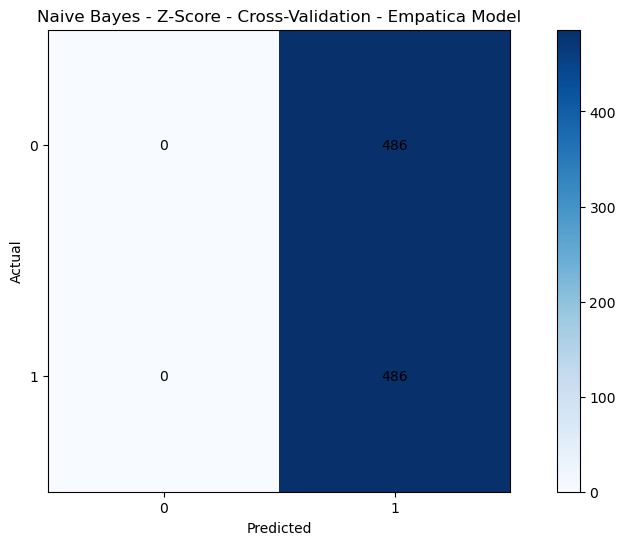

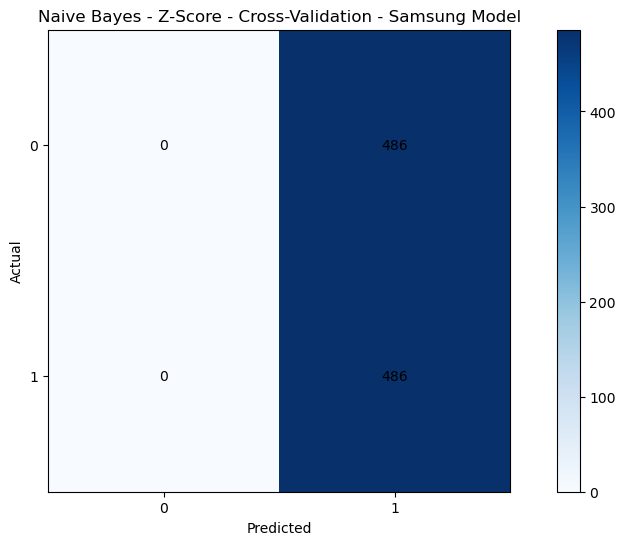

In [2]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define the number of folds in the training set
N_FOLDS = 5


# Guidance for performing a F-Fold Cross Validation, using the sklearn.model_selection.KFold, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
def k_fold_cross_validation(model, X_train, y_train):
    kf = KFold(n_splits=N_FOLDS)
    best_model = None
    best_accuracy = 0

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        if "ID" in X_train.columns:
            X_train_fold = X_train_fold.drop(columns=["ID"])
            X_val_fold = X_val_fold.drop(columns=["ID"])

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        accuracy = accuracy_score(y_val_fold, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model


# Define Naive Bayes models
model_empatica_nb = GaussianNB()
model_samsung_nb = GaussianNB()

# Guidance for performing a F-Fold Cross Validation, using the sklearn.model_selection.KFold, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
model_empatica_nb = k_fold_cross_validation(
    model_empatica_nb, X_train_empatica, y_train_empatica
)
model_samsung_nb = k_fold_cross_validation(
    model_samsung_nb, X_train_samsung, y_train_samsung
)

# Predictions
y_pred_empatica_nb = model_empatica_nb.predict(X_test_empatica)
y_pred_samsung_nb = model_samsung_nb.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_nb = accuracy_score(y_test_empatica, y_pred_empatica_nb)
accuracy_samsung_nb = accuracy_score(y_test_samsung, y_pred_samsung_nb)

print("Empatica Model (NB) Accuracy:", accuracy_empatica_nb)
print("Samsung Model (NB) Accuracy:", accuracy_samsung_nb)

# Classification report
print(
    "\nClassification Report (Empatica Model NB):\n",
    classification_report(y_test_empatica, y_pred_empatica_nb, zero_division=1),
)
print(
    "\nClassification Report (Samsung Model NB):\n",
    classification_report(y_test_samsung, y_pred_samsung_nb, zero_division=1),
)

# Confusion matrix
conf_mat_empatica_nb = confusion_matrix(y_test_empatica, y_pred_empatica_nb)
conf_mat_samsung_nb = confusion_matrix(y_test_samsung, y_pred_samsung_nb)

print("\nConfusion Matrix (Empatica Model NB):\n", conf_mat_empatica_nb)
print("\nConfusion Matrix (Samsung Model NB):\n", conf_mat_samsung_nb)

# Visualize the cm for Empatica model
plt.figure(figsize=(12, 6))
plt.imshow(conf_mat_empatica_nb, cmap="Blues")
plt.title("Naive Bayes - Z-Score - Cross-Validation - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_nb.shape[0]):
    for j in range(conf_mat_empatica_nb.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_nb[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the cm for Samsung model
plt.figure(figsize=(12, 6))
plt.imshow(conf_mat_samsung_nb, cmap="Blues")
plt.title("Naive Bayes - Z-Score - Cross-Validation - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_nb.shape[0]):
    for j in range(conf_mat_samsung_nb.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_nb[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

## Min-Max


Empatica Model (NB) Accuracy: 0.49074074074074076
Samsung Model (NB) Accuracy: 0.0874485596707819

Classification Report (Empatica Model NB):
               precision    recall  f1-score   support

           0       0.00      0.00      1.00       486
           1       0.50      0.98      0.66       486

    accuracy                           0.49       972
   macro avg       0.25      0.49      0.83       972
weighted avg       0.25      0.49      0.83       972


Classification Report (Samsung Model NB):
               precision    recall  f1-score   support

           0       0.15      0.17      0.16       486
           1       0.00      0.00      0.00       486

    accuracy                           0.09       972
   macro avg       0.08      0.09      0.08       972
weighted avg       0.08      0.09      0.08       972


Confusion Matrix (Empatica Model NB):
 [[  0 486]
 [  9 477]]

Confusion Matrix (Samsung Model NB):
 [[ 84 402]
 [485   1]]


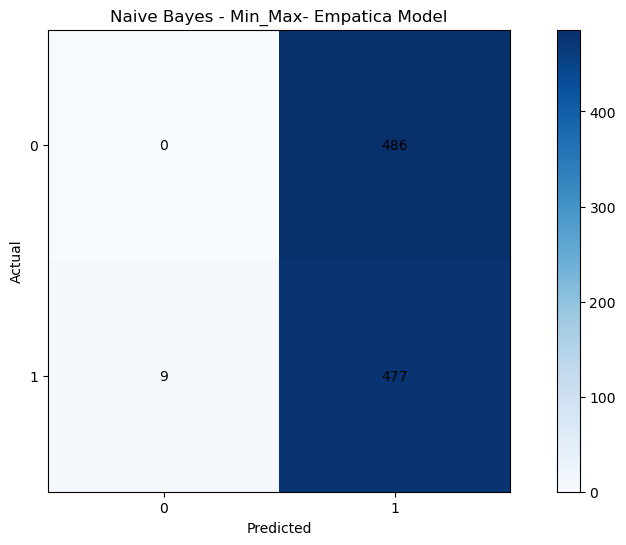

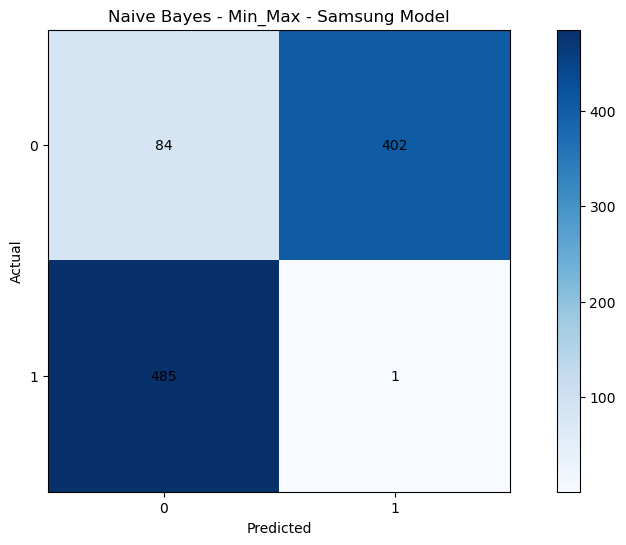

In [3]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Define file paths
training_file_path = "./data/6-data-split//min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define Naive Bayes models
model_empatica_nb = GaussianNB()
model_samsung_nb = GaussianNB()

# Train the models
model_empatica_nb.fit(X_train_empatica, y_train_empatica)
model_samsung_nb.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica_nb = model_empatica_nb.predict(X_test_empatica)
y_pred_samsung_nb = model_samsung_nb.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_nb = accuracy_score(y_test_empatica, y_pred_empatica_nb)
accuracy_samsung_nb = accuracy_score(y_test_samsung, y_pred_samsung_nb)

print("Empatica Model (NB) Accuracy:", accuracy_empatica_nb)
print("Samsung Model (NB) Accuracy:", accuracy_samsung_nb)

# Classification report
print(
    "\nClassification Report (Empatica Model NB):\n",
    classification_report(y_test_empatica, y_pred_empatica_nb, zero_division=1),
)
print(
    "\nClassification Report (Samsung Model NB):\n",
    classification_report(y_test_samsung, y_pred_samsung_nb, zero_division=1),
)

# Confusion matrix
conf_mat_empatica_nb = confusion_matrix(y_test_empatica, y_pred_empatica_nb)
conf_mat_samsung_nb = confusion_matrix(y_test_samsung, y_pred_samsung_nb)

print("\nConfusion Matrix (Empatica Model NB):\n", conf_mat_empatica_nb)
print("\nConfusion Matrix (Samsung Model NB):\n", conf_mat_samsung_nb)

# Visualize the cm for Empatica model
plt.figure(figsize=(12, 6))
plt.imshow(conf_mat_empatica_nb, cmap="Blues")
plt.title("Naive Bayes - Min_Max- Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_nb.shape[0]):
    for j in range(conf_mat_empatica_nb.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_nb[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the cm for Samsung model
plt.figure(figsize=(12, 6))
plt.imshow(conf_mat_samsung_nb, cmap="Blues")
plt.title("Naive Bayes - Min_Max - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_nb.shape[0]):
    for j in range(conf_mat_samsung_nb.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_nb[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

### K-Fold Cross validation


Empatica Model (NB) Accuracy: 0.5
Samsung Model (NB) Accuracy: 0.5

Classification Report (Empatica Model NB):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.75      0.50      0.33       972
weighted avg       0.75      0.50      0.33       972


Classification Report (Samsung Model NB):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.75      0.50      0.33       972
weighted avg       0.75      0.50      0.33       972


Confusion Matrix (Empatica Model NB):
 [[  0 486]
 [  0 486]]

Confusion Matrix (Samsung Model NB):
 [[  0 486]
 [  0 486]]


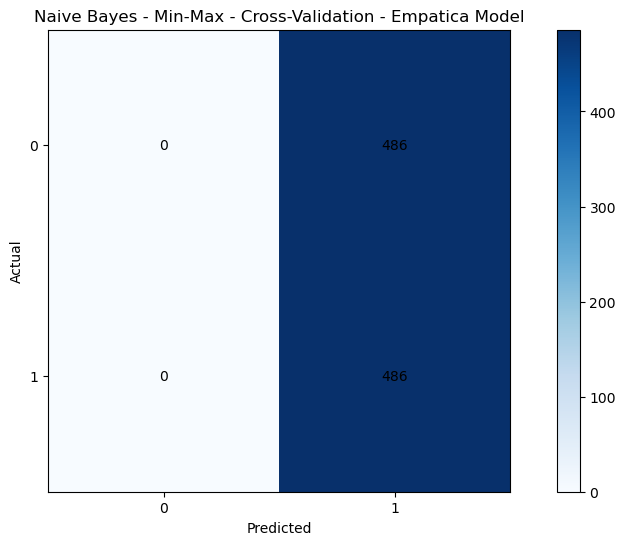

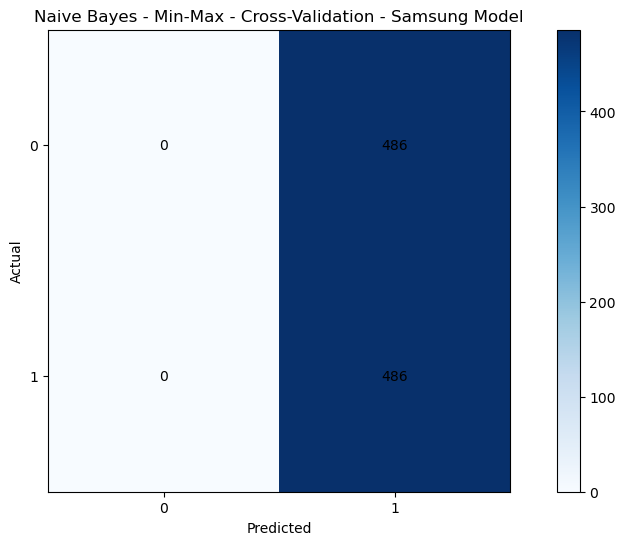

In [4]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define the number of folds in the training set
N_FOLDS = 5


# Guidance for performing a F-Fold Cross Validation, using the sklearn.model_selection.KFold, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
def k_fold_cross_validation(model, X_train, y_train):
    kf = KFold(n_splits=N_FOLDS)
    best_model = None
    best_accuracy = 0

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        if "ID" in X_train.columns:
            X_train_fold = X_train_fold.drop(columns=["ID"])
            X_val_fold = X_val_fold.drop(columns=["ID"])

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        accuracy = accuracy_score(y_val_fold, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model


# Define Naive Bayes models
model_empatica_nb = GaussianNB()
model_samsung_nb = GaussianNB()

# Guidance for performing a F-Fold Cross Validation, using the sklearn.model_selection.KFold, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
model_empatica_nb = k_fold_cross_validation(
    model_empatica_nb, X_train_empatica, y_train_empatica
)
model_samsung_nb = k_fold_cross_validation(
    model_samsung_nb, X_train_samsung, y_train_samsung
)

# Predictions
y_pred_empatica_nb = model_empatica_nb.predict(X_test_empatica)
y_pred_samsung_nb = model_samsung_nb.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_nb = accuracy_score(y_test_empatica, y_pred_empatica_nb)
accuracy_samsung_nb = accuracy_score(y_test_samsung, y_pred_samsung_nb)

print("Empatica Model (NB) Accuracy:", accuracy_empatica_nb)
print("Samsung Model (NB) Accuracy:", accuracy_samsung_nb)

# Classification report
print(
    "\nClassification Report (Empatica Model NB):\n",
    classification_report(y_test_empatica, y_pred_empatica_nb, zero_division=1),
)
print(
    "\nClassification Report (Samsung Model NB):\n",
    classification_report(y_test_samsung, y_pred_samsung_nb, zero_division=1),
)

# Confusion matrix
conf_mat_empatica_nb = confusion_matrix(y_test_empatica, y_pred_empatica_nb)
conf_mat_samsung_nb = confusion_matrix(y_test_samsung, y_pred_samsung_nb)

print("\nConfusion Matrix (Empatica Model NB):\n", conf_mat_empatica_nb)
print("\nConfusion Matrix (Samsung Model NB):\n", conf_mat_samsung_nb)

# Visualize the cm for Empatica model
plt.figure(figsize=(12, 6))
plt.imshow(conf_mat_empatica_nb, cmap="Blues")
plt.title("Naive Bayes - Min-Max - Cross-Validation - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_nb.shape[0]):
    for j in range(conf_mat_empatica_nb.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_nb[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the cm for Samsung model
plt.figure(figsize=(12, 6))
plt.imshow(conf_mat_samsung_nb, cmap="Blues")
plt.title("Naive Bayes - Min-Max - Cross-Validation - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_nb.shape[0]):
    for j in range(conf_mat_samsung_nb.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_nb[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()